# Trabajo Práctico Integrado N.º 2

<div style='display:flex;justify-content:center;align-items:center;'>
<img src='/work/analisis-de-cuenta.png' width=350px></div>

## Análisis exploratorio (analítico y visual)

### Lista de objetivos

- Importar librerías
- Cargar datos en un dataframe
- Visualizar las primeras 5 filas
- Visualizar las últimas 5 filas
- Generar un resumen estadístico
- Ver tipos de datos
- Eliminar duplicados
- Eliminar columnas irrelevantes
- Renombrar columnas
- Buscar valores nulos
- Detectar outliers
- Encontrar correlaciones y frecuencias




In [1]:
# Importación de librerias:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### Cargando datos

In [2]:
df = pd.read_csv('/work/exams.csv')
df

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
0,10-5894942,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,41-1676468,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,64-6396924,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,35-2426788,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,60-9387304,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...
1013,82-7312119,male,group E,associate's degree,standard,yes,none,74.0,73.0,67.0,71.0
1014,45-3445439,male,group E,some college,free/reduced,no,none,78.0,84.0,77.0,80.0
1015,02-3651562,male,group A,some college,standard,no,completed,78.0,78.0,74.0,77.0
1016,05-5203587,female,group B,some college,standard,yes,none,75.0,76.0,81.0,77.0


### Visualizando las primeras 5 filas

In [3]:
df.head()

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
0,10-5894942,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,41-1676468,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,64-6396924,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,35-2426788,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,60-9387304,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0


### Visualizando las últimas 5 filas

In [4]:
df.tail()

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
1013,82-7312119,male,group E,associate's degree,standard,yes,none,74.0,73.0,67.0,71.0
1014,45-3445439,male,group E,some college,free/reduced,no,none,78.0,84.0,77.0,80.0
1015,02-3651562,male,group A,some college,standard,no,completed,78.0,78.0,74.0,77.0
1016,05-5203587,female,group B,some college,standard,yes,none,75.0,76.0,81.0,77.0
1017,13-3347050,male,group D,some college,standard,no,completed,70.0,60.0,65.0,65.0


### Resumen estadístico

In [5]:
df.describe()

,math score,physics score,chemistry score,algebra_score
count,1011.000000,1011.000000,1011.000000,1011.000000
mean,66.480712,69.063304,67.789318,67.778437
std,15.326880,14.694107,15.559853,14.450680
min,13.000000,27.000000,23.000000,22.000000
25%,56.000000,60.000000,58.000000,59.000000
50%,67.000000,70.000000,68.000000,68.000000
75%,77.000000,79.000000,79.000000,78.000000
max,100.000000,100.000000,100.000000,100.000000


### Tipos de datos

In [6]:
df.dtypes

id                              object
gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
employed                        object
test preparation course         object
math score                     float64
physics score                  float64
chemistry score                float64
algebra_score                  float64
dtype: object

### Eliminación de datos duplicados

In [7]:
print(f'Original:{df.id.count()} filas')
duplicate_rows_df = df[df.duplicated()]
print(f'Cantidad de filas duplicadas: {duplicate_rows_df.id.count()}')

df_2 = df.drop_duplicates()

Original:1018 filas
Cantidad de filas duplicadas: 18


Después de eliminar las filas duplicadas:

In [8]:
print(f'Final: {df_2.id.count()} filas')

Final: 1000 filas


### Eliminación de columnas irrelevantes

In [9]:
df_2.columns.to_list()

['id',
 'gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'employed',
 'test preparation course',
 'math score',
 'physics score',
 'chemistry score',
 'algebra_score']

La columna id ya no la necesitamos más.

In [10]:
df_3 = df_2.drop(['id'], axis='columns')
print(df_3.columns.to_list())

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'employed', 'test preparation course', 'math score', 'physics score', 'chemistry score', 'algebra_score']


### Renombrando columnas

In [11]:
titles = df_3.columns.to_list()
titles_cap = [title.replace('_', ' ').capitalize() for title in titles]
titles_cap[1] = 'Ethnicity'
res = {k: v for k,v in zip(titles,titles_cap)}

df_4 = df_3.rename(columns = res)
df_4.columns.to_list()

['Gender',
 'Ethnicity',
 'Parental level of education',
 'Lunch',
 'Employed',
 'Test preparation course',
 'Math score',
 'Physics score',
 'Chemistry score',
 'Algebra score']

### Búsqueda de valores nulos

In [12]:
df_4.isnull().sum()

Gender                         0
Ethnicity                      0
Parental level of education    0
Lunch                          0
Employed                       0
Test preparation course        0
Math score                     7
Physics score                  7
Chemistry score                7
Algebra score                  7
dtype: int64

In [13]:
df_4[df_4.isnull().any(axis=1)]

,Gender,Ethnicity,Parental level of education,Lunch,Employed,Test preparation course,Math score,Physics score,Chemistry score,Algebra score
848,male,group A,some college,standard,yes,completed,NaN,NaN,NaN,NaN
867,female,group D,some college,standard,yes,none,NaN,NaN,NaN,NaN
885,male,group C,some high school,standard,no,none,NaN,NaN,NaN,NaN
900,male,group E,associate's degree,standard,yes,none,NaN,NaN,NaN,NaN
914,female,group C,some college,free/reduced,yes,completed,NaN,NaN,NaN,NaN
930,female,group E,some high school,standard,no,none,NaN,NaN,NaN,NaN
947,female,group D,some college,standard,no,none,NaN,NaN,NaN,NaN


Estos valores nulos representan en el dataset el siguiente porcentaje:

In [14]:
print(100 * df_4.isnull().sum()/df_4.shape[0])

# Las filas con valores nulos representan el 0.7% del total de los datos, pueden ser eliminados tranquilamente

Gender                         0.0
Ethnicity                      0.0
Parental level of education    0.0
Lunch                          0.0
Employed                       0.0
Test preparation course        0.0
Math score                     0.7
Physics score                  0.7
Chemistry score                0.7
Algebra score                  0.7
dtype: float64


Después de eliminarlos:

In [15]:
df_5 = df_4.dropna()
df_5.isnull().sum()

Gender                         0
Ethnicity                      0
Parental level of education    0
Lunch                          0
Employed                       0
Test preparation course        0
Math score                     0
Physics score                  0
Chemistry score                0
Algebra score                  0
dtype: int64

### Detección y eliminación de outliers

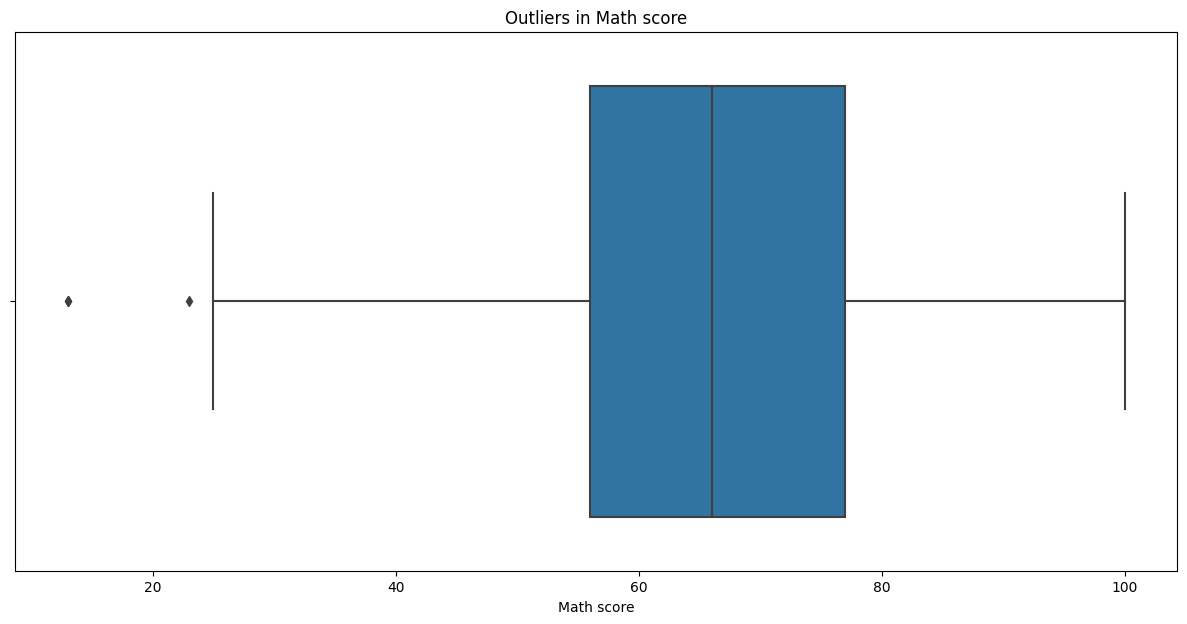

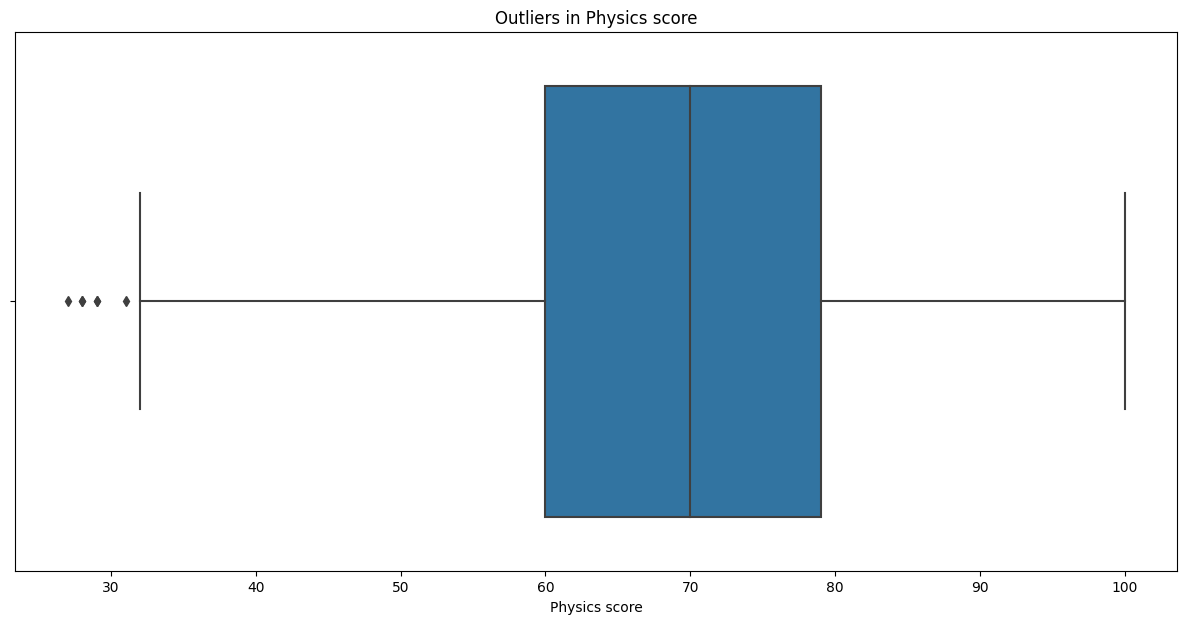

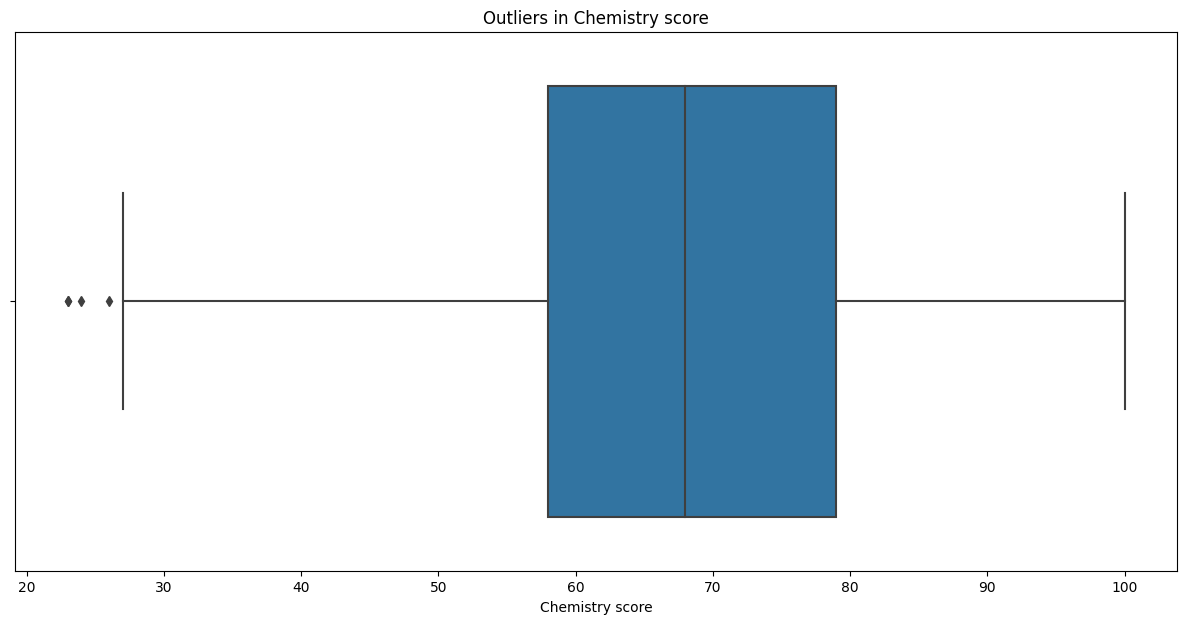

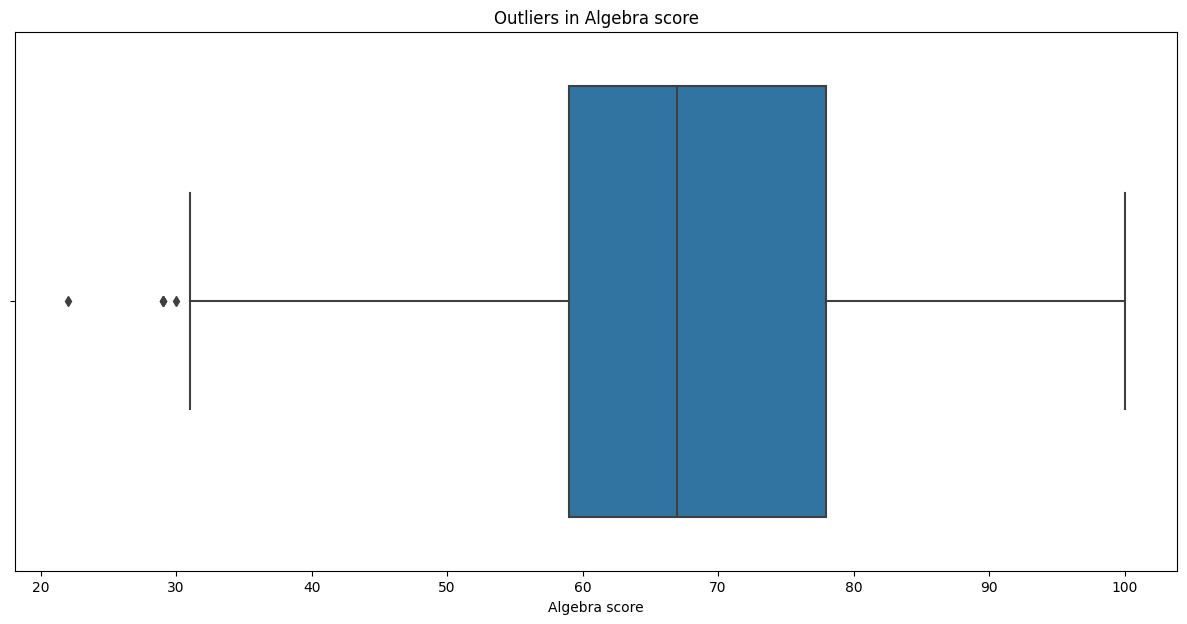

In [16]:
for col in df_5.columns:
    if df_5[col].dtype == 'float64':
        plt.figure(figsize=(15,7))
        sns.boxplot(x=df_5[col])
        plt.title(f"Outliers in {col}")
        plt.show()

In [17]:
print(f'Antes: {df_5.Lunch.count()} filas\n')
Q1 = df_5.quantile(0.25)
Q3 = df_4.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df_6 = df_5[~( (df_5.lt(Q1-1.5*IQR)) | (df_5.gt(Q3+1.5*IQR)) ).any(axis=1)]
print(f'\nDespués: {df_6.Lunch.count()} filas\n')

Antes: 993 filas

Math score         21.0
Physics score      19.0
Chemistry score    21.0
Algebra score      19.0
dtype: float64

Después: 984 filas



### Correlaciones y frecuencias

#### Histogramas

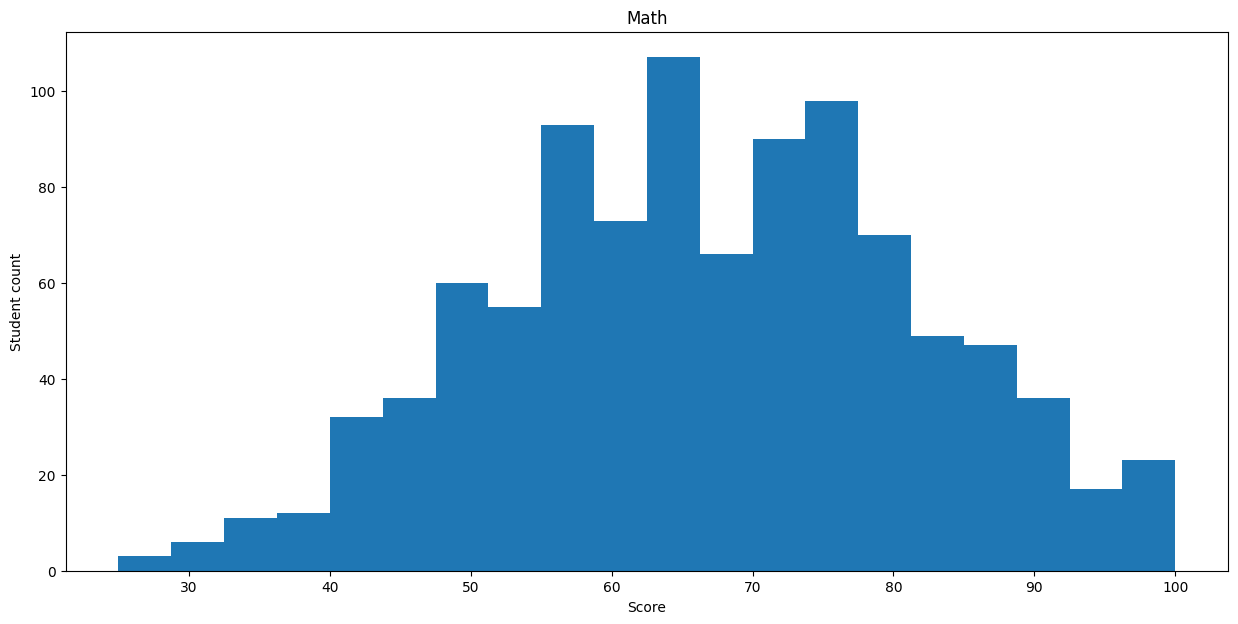

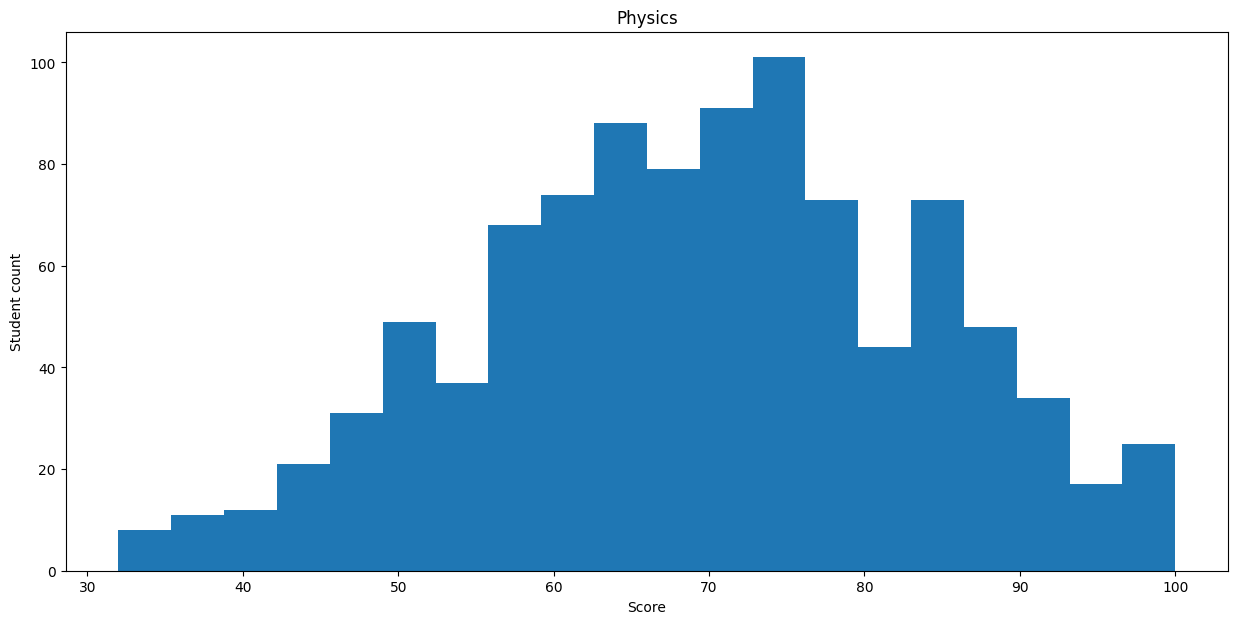

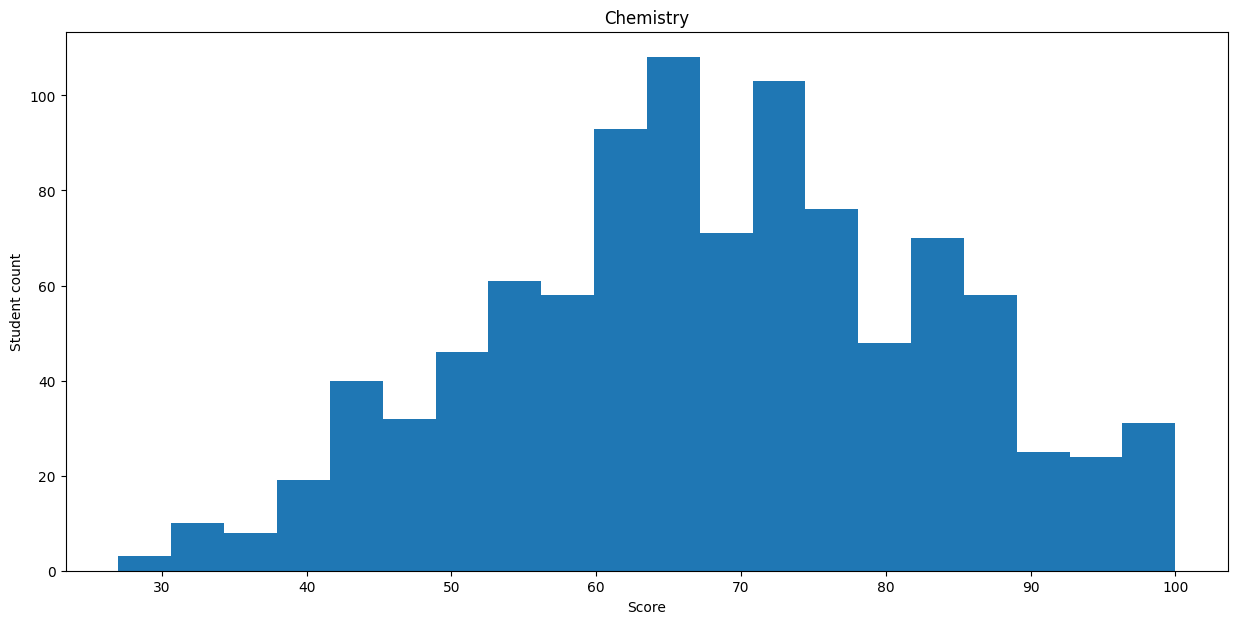

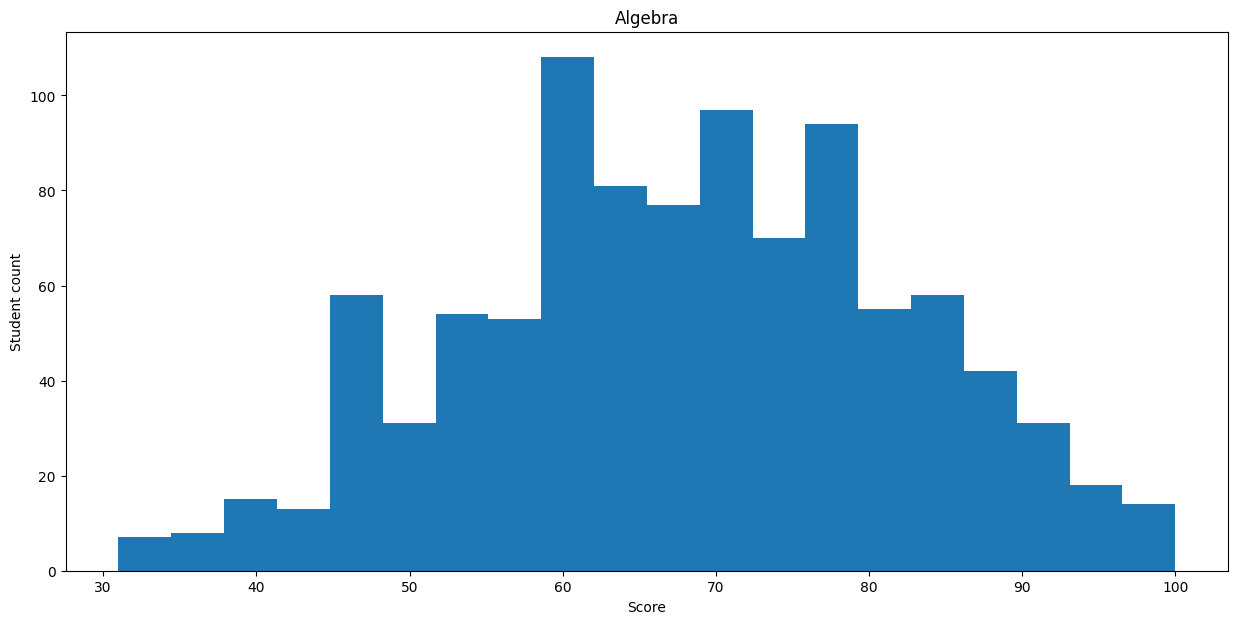

In [18]:
for col in df_6.columns:
    if df_6[col].dtype == 'float64':
        plt.figure(figsize=(15,7))
        plt.hist(df_6[col], bins=20)
        plt.title(col.split()[0])
        plt.ylabel("Student count")
        plt.xlabel("Score")
        plt.show()

#### Mapas de calor

In [19]:
correlations = df_6.corr()
correlations

,Math score,Physics score,Chemistry score,Algebra score
Math score,1.000000,0.812055,0.798312,0.916674
Physics score,0.812055,1.000000,0.951536,0.968358
Chemistry score,0.798312,0.951536,1.000000,0.964652
Algebra score,0.916674,0.968358,0.964652,1.000000


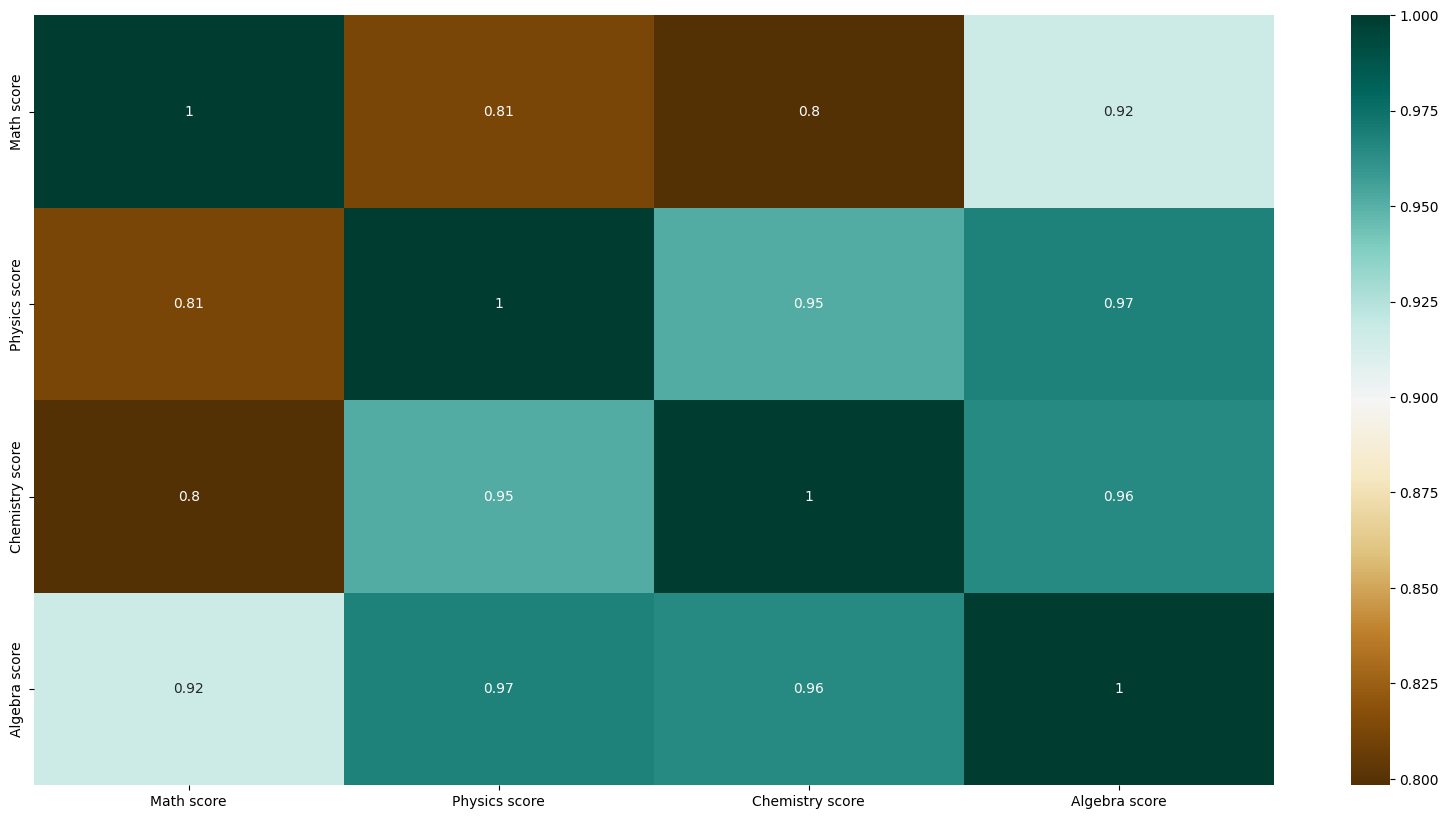

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(correlations, cmap='BrBG', annot=True)
plt.show()

#### Graficos circulares o porcentuales:

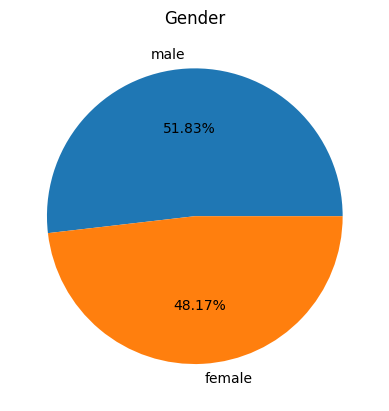

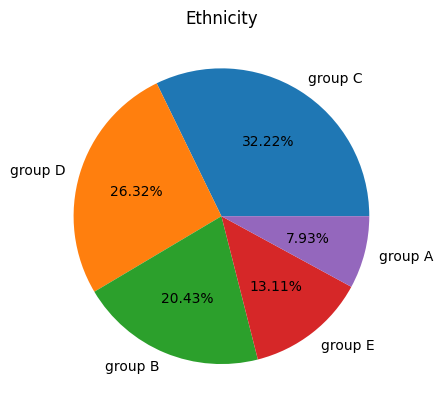

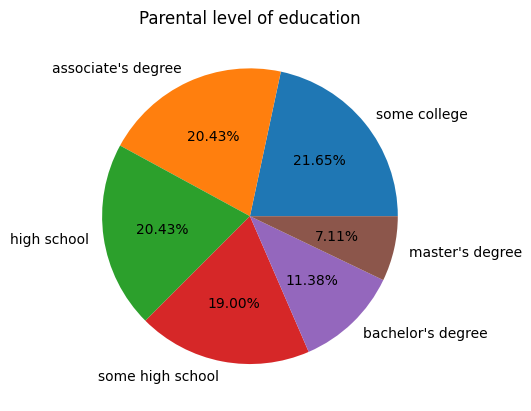

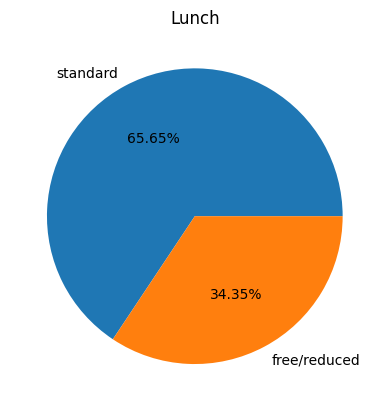

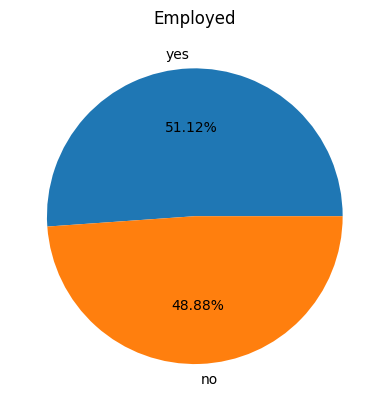

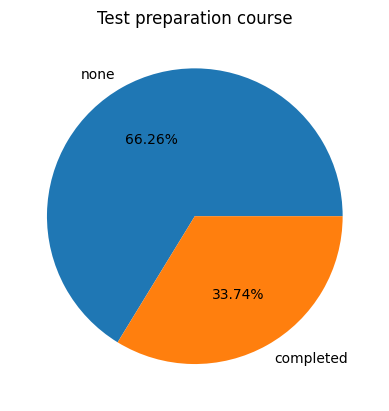

In [21]:
for col in df_6.columns:
    if df_6[col].dtype == 'object':
        labels = df_6[col].value_counts().index
        sizes = df_6[col].value_counts()
        plt.pie(sizes, labels=labels, autopct='%1.2f%%')
        plt.title(col)
        plt.show()

## Preguntas

<div style='display:flex;justify-content:center;align-items:center;'>
<img src='/work/answer.png' width=350px></div>

### ¿Qué factores son los que más influyen sobre las calificaciones de los estudiantes?

In [22]:
df_6

,Gender,Ethnicity,Parental level of education,Lunch,Employed,Test preparation course,Math score,Physics score,Chemistry score,Algebra score
0,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0
...,...,...,...,...,...,...,...,...,...,...
1001,male,group C,high school,standard,yes,none,73.0,70.0,65.0,69.0
1002,male,group D,associate's degree,free/reduced,no,completed,85.0,91.0,92.0,89.0
1003,female,group C,some high school,free/reduced,yes,none,32.0,35.0,41.0,36.0
1004,female,group C,some college,standard,yes,none,73.0,74.0,82.0,76.0


Codificaremos las columnas que contienen características mixtas no-numéricas de la siguiente forma:

In [23]:
columns = [x for x in df_6.columns if df_6[x].dtype == 'object']

df_8 = df_6.copy()
for col in columns:
    lista = df_6[col].unique()
    print(f'# {col.upper()}:')
    for i, tipo in enumerate(lista):
        print(f'# {tipo} = {i}')
        df_8.loc[df_8[col] == tipo, col] = i
    print('# ------------------')
    df_8[[col]] = df_8[[col]].apply(pd.to_numeric)
df_8

# GENDER:
# male = 0
# female = 1
# ------------------
# ETHNICITY:
# group A = 0
# group D = 1
# group E = 2
# group B = 3
# group C = 4
# ------------------
# PARENTAL LEVEL OF EDUCATION:
# high school = 0
# some high school = 1
# some college = 2
# associate's degree = 3
# bachelor's degree = 4
# master's degree = 5
# ------------------
# LUNCH:
# standard = 0
# free/reduced = 1
# ------------------
# EMPLOYED:
# yes = 0
# no = 1
# ------------------
# TEST PREPARATION COURSE:
# completed = 0
# none = 1
# ------------------


,Gender,Ethnicity,Parental level of education,Lunch,Employed,Test preparation course,Math score,Physics score,Chemistry score,Algebra score
0,0,0,0,0,0,0,67.0,67.0,63.0,66.0
1,1,1,1,1,1,1,40.0,59.0,55.0,51.0
2,0,2,2,1,1,1,59.0,60.0,50.0,56.0
3,0,3,0,0,0,1,77.0,78.0,68.0,74.0
4,0,2,3,0,0,0,78.0,73.0,68.0,73.0
...,...,...,...,...,...,...,...,...,...,...
1001,0,4,0,0,0,1,73.0,70.0,65.0,69.0
1002,0,1,3,1,1,0,85.0,91.0,92.0,89.0
1003,1,4,1,1,0,1,32.0,35.0,41.0,36.0
1004,1,4,2,0,0,1,73.0,74.0,82.0,76.0


De esta forma podemos elaborar un mapa de calor para ver como se correlacionan estas características con las calificaciones de los estudiantes:

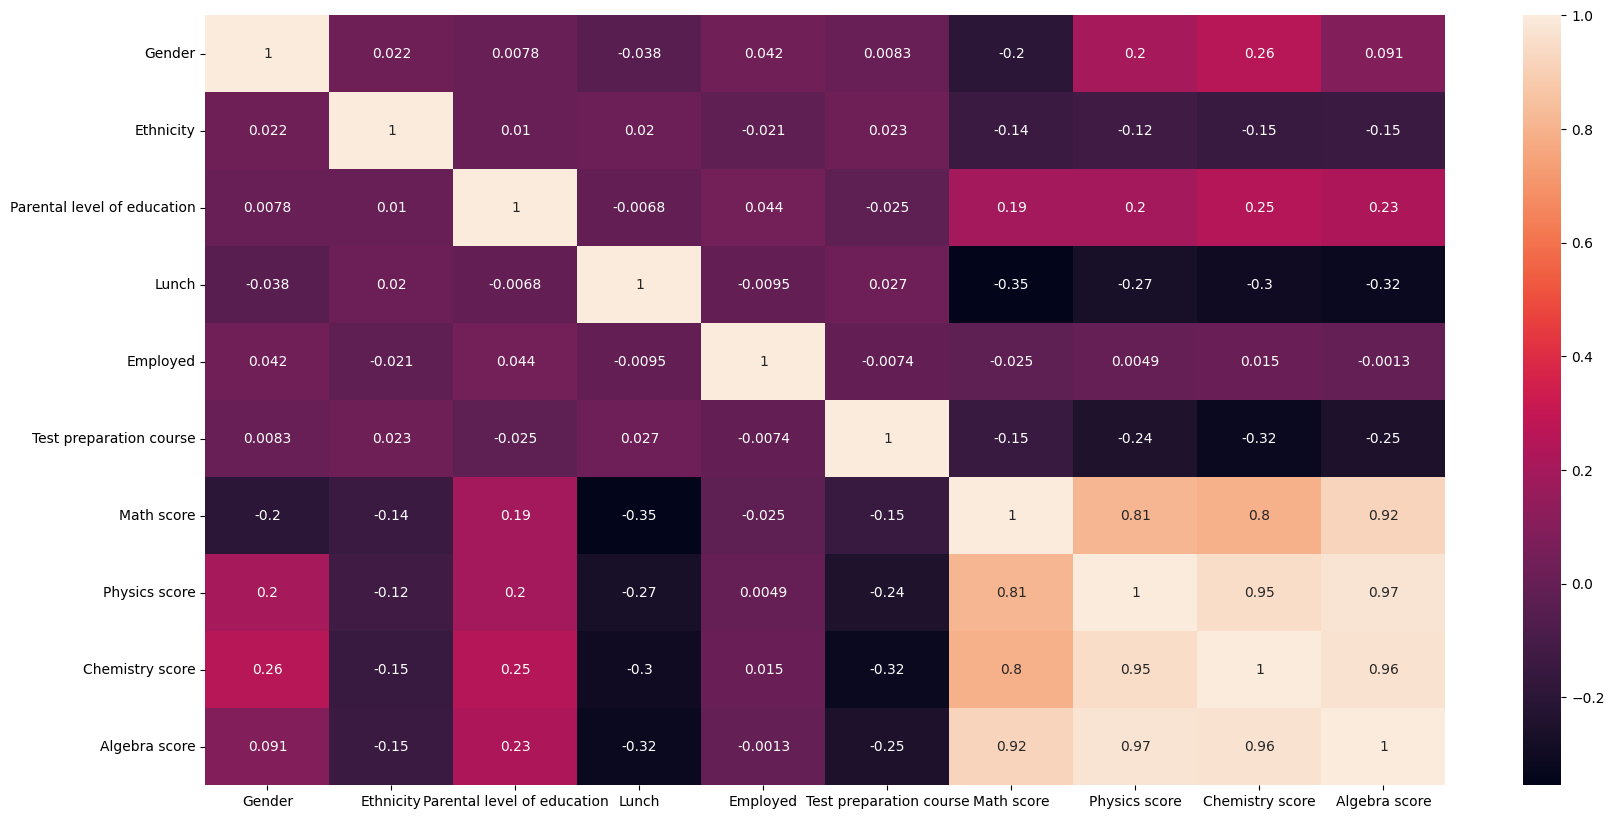

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df_8.corr(), annot=True)
plt.show()

Con ayuda de este mapa podemos tener una idea el valor de correlación entre cada característica, ya hemos visto que entre las calificaciones de las asignaturas hay fuertes correlaciones y no es de extrañar, ya que las 4 asignaturas pertenecen al campo de las ciencias exactas, pero lo que nos interesa en esta sección es la relación de las calificaciones con respecto al resto de características disponibles en el dataset, por eso debemos hacer un enfoque en el siguiente sector del mapa de calor:

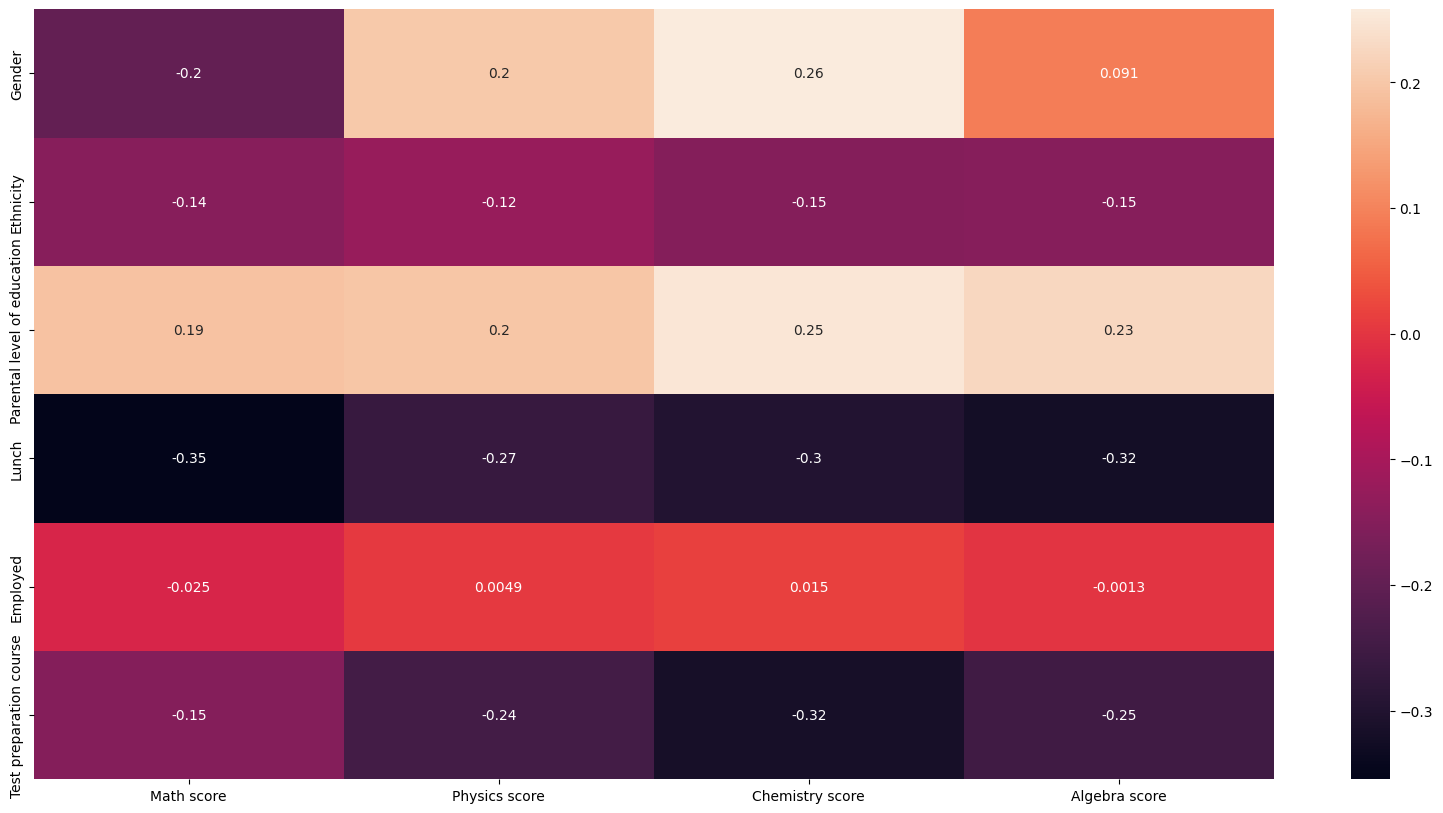

In [25]:
columns = [x for x in df_6.columns if df_6[x].dtype == 'float64']

plt.figure(figsize=(20,10))
sns.heatmap(df_8.corr()[0:6][columns], annot=True)
plt.show()

<Figure size 1500x700 with 0 Axes>

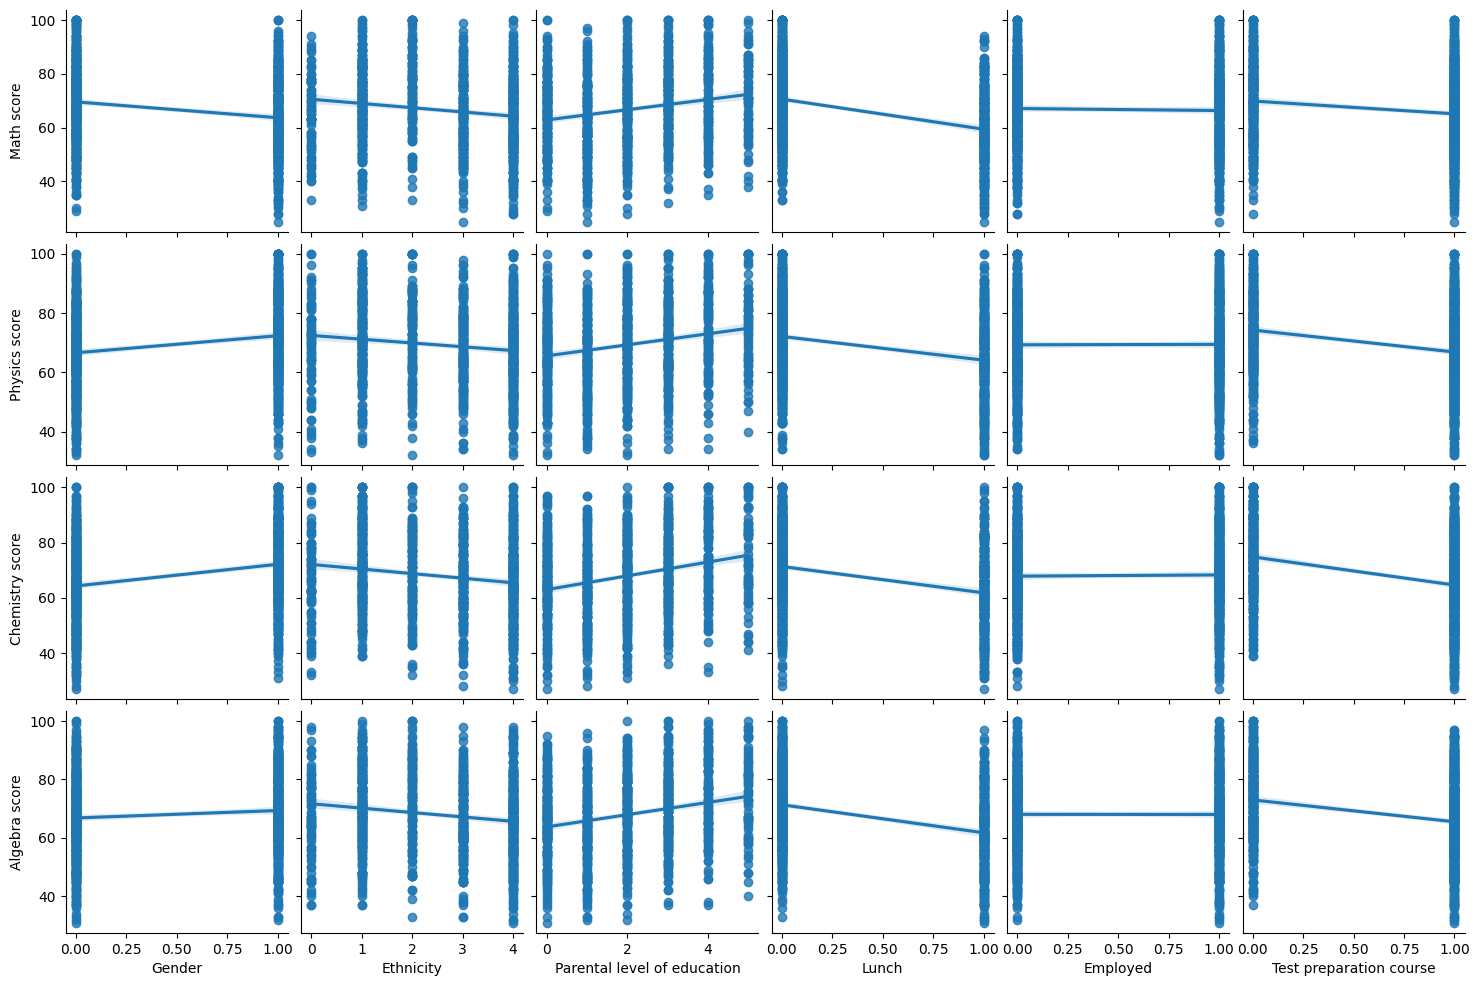

In [26]:
plt.figure(figsize=(15,7))
sns.pairplot(df_8, 
            y_vars=['Math score', 'Physics score', 'Chemistry score', 'Algebra score'], 
            x_vars=['Gender', 'Ethnicity', 'Parental level of education', 'Lunch', 'Employed', 'Test preparation course'],
            kind = 'reg')
plt.show()

Observando este sector podemos ver varias cosas

- El almuerzo es el factor que mayor correlación tiene con las calificaciones, como tenemos una correlación negativa y teniendo en cuenta que 0 es un almuerzo estándar y 1 es un almuerzo free o reducido, entonces concluimos que tener un almuerzo estándar favorece ligeramente a las calificaciones de los alumnos.

- El estado laboral de los alumnos casi no tiene correlación sobre las calificaciones de los alumnos, veremos esto más adelante.

- Las calificaciones en Álgebra tienen una baja correlación con el género de los alumnos, podría pensarse que ambos géneros se encuentran en condiciones similares con respecto a esta asignatura, lo veremos más adelante.

- El nivel de educación de los padres también afecto positivamente a las calificaciones de sus hijos, cuanto más alto fue el nivel de educación alcanzado por los padres mayores calificaciones obtuvieron sus hijos, y esto parece algo razonable, la educación de los padres comúnmente es transmitida a sus hijos.

- Los alumnos que realizaron el curso de preparación para exámenes vieron afectadas positivamente sus calificaciones, lo veremos a continuación.

### ¿Hay alguna relación entre el promedio de notas obtenidas y el hecho de haber realizado el curso preparatorio?

Agreguemos una columna más con el promedio general de cada alumno:

In [27]:
df_7 = df_6.copy()
df_7['Average score'] = df_7.mean(axis=1)
df_7

,Gender,Ethnicity,Parental level of education,Lunch,Employed,Test preparation course,Math score,Physics score,Chemistry score,Algebra score,Average score
0,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0,65.75
1,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0,51.25
2,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0,56.25
3,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0,74.25
4,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0,73.00
...,...,...,...,...,...,...,...,...,...,...,...
1001,male,group C,high school,standard,yes,none,73.0,70.0,65.0,69.0,69.25
1002,male,group D,associate's degree,free/reduced,no,completed,85.0,91.0,92.0,89.0,89.25
1003,female,group C,some high school,free/reduced,yes,none,32.0,35.0,41.0,36.0,36.00
1004,female,group C,some college,standard,yes,none,73.0,74.0,82.0,76.0,76.25


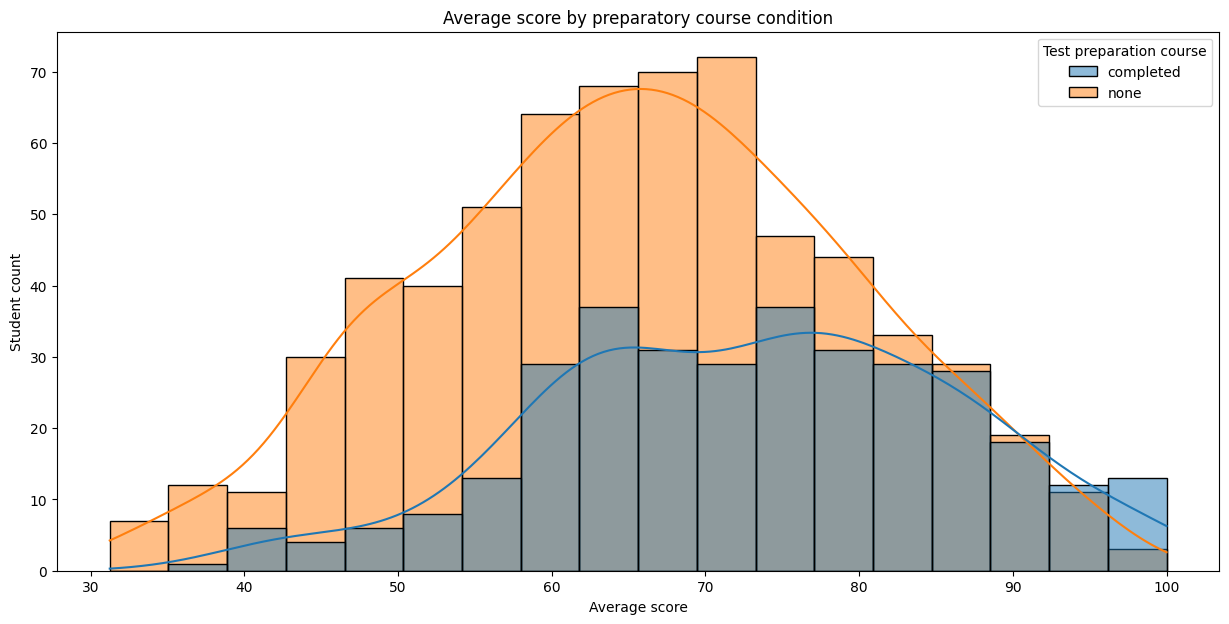

In [28]:
plt.figure(figsize = (15,7))
sns.histplot(df_7, x='Average score', hue="Test preparation course", fill=True, kde='reg')
plt.title("Average score by preparatory course condition")
plt.ylabel("Student count")
plt.show()

In [29]:
print("Realizaron el curso:", df_7[df_7["Test preparation course"] == 'completed'].shape[0])
print("Realizaron el curso:", df_7[df_7["Test preparation course"] == 'none'].shape[0])

Realizaron el curso: 332
Realizaron el curso: 652


Conclusión: Si bien la cantidad de alumnos que no realizo el curso preparatorio casi duplica a la de quienes lo han completado, esta diferencia no se ve reflejada significativamente en el promedio de notas. Se recomienda auditar los contenidos del curso, a fines de lograr una mejora en el rendimiento académico y aumentar el interés del alumnado.

### ¿Cómo afecta en las calificaciones de los alumnos el estado laboral de los mismos?

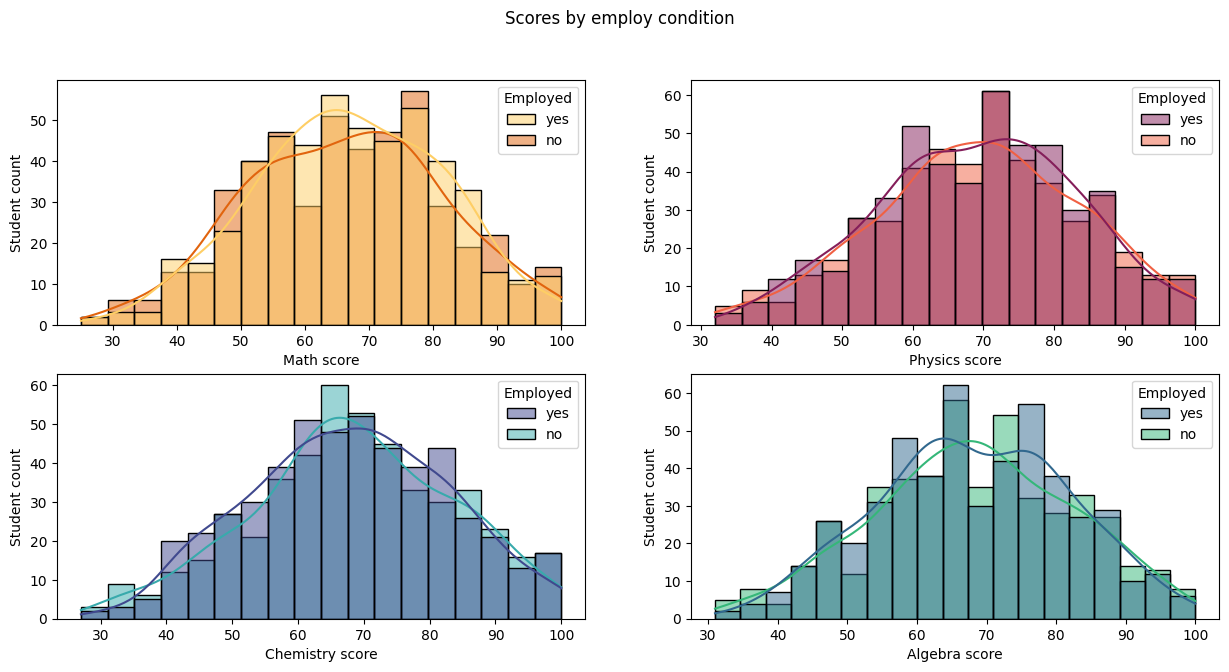

In [30]:
def setYlabel(axs,label):
    for axs_row in axs:
        for axs_col in axs_row:
            axs_col.set_ylabel(label)
    return

fig,axs = plt.subplots(2,2, figsize = (15,7))

sns.histplot(data=df_6, x="Math score", kde=True, ax=axs[0, 0], palette='YlOrBr', hue='Employed')
sns.histplot(data=df_6, x="Physics score", kde=True, ax=axs[0, 1], palette="rocket", hue='Employed')
sns.histplot(data=df_6, x="Chemistry score", kde=True, ax=axs[1, 0], palette="mako", hue='Employed')
sns.histplot(data=df_6, x="Algebra score", kde=True, ax=axs[1, 1], palette="viridis", hue='Employed')
setYlabel(axs,"Student count")
fig.suptitle("Scores by employ condition")
fig.show()

A simple vista no podemos extraer mucha información, ambos grupos parecen presentar desempeños similares en la mayoría de asignaturas. Veamos como se ve afectado el promedio de ambos grupos:

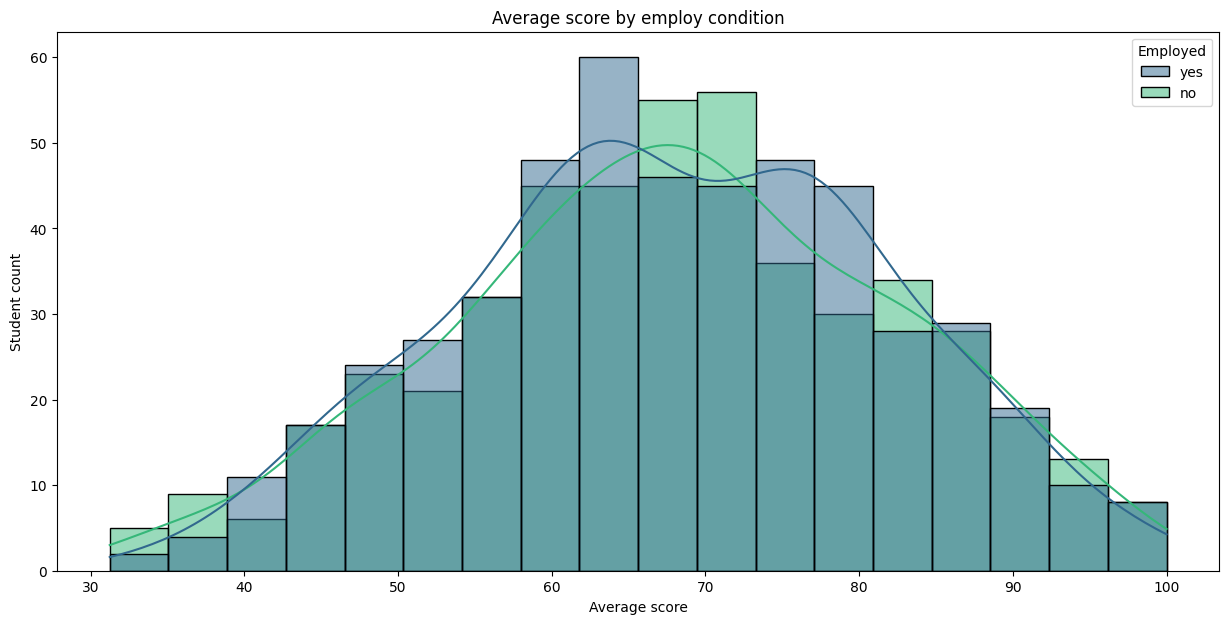

In [31]:
plt.figure(figsize=(15,7))
sns.histplot(data=df_7, x="Average score", kde=True, palette="viridis", hue='Employed')
plt.ylabel("Student count")
plt.title("Average score by employ condition")
plt.show()

In [32]:
employed_median_score = round(df_7[df_7["Employed"] == 'yes'].mean(), 3)
unemployed_median_score = round(df_7[df_7["Employed"] == 'no'].mean(), 3)
pd.DataFrame(data={'Employed':employed_median_score, 'Unemployed':unemployed_median_score})

,Employed,Unemployed
Math score,67.076,66.326
Physics score,69.264,69.405
Chemistry score,67.843,68.285
Algebra score,68.052,68.015
Average score,68.059,68.008


En conclusión, podemos decir que el estado laboral de los estudiantes afecta muy poco en las calificaciones. Como comentario, para poder dar una respuesta más certera a esta pregunta deberíamos analizar como afecta el estado laboral del estudiante en el porcentaje de deserciones, pero no contamos con esta información, ya que supongo que se han tenido en cuenta solamente aquellos alumnos que han llegado a las instancias finales de las asignaturas.

### ¿Cuánto influye el nivel de estudio alcanzado por los padres en las calificaciones de sus hijos?

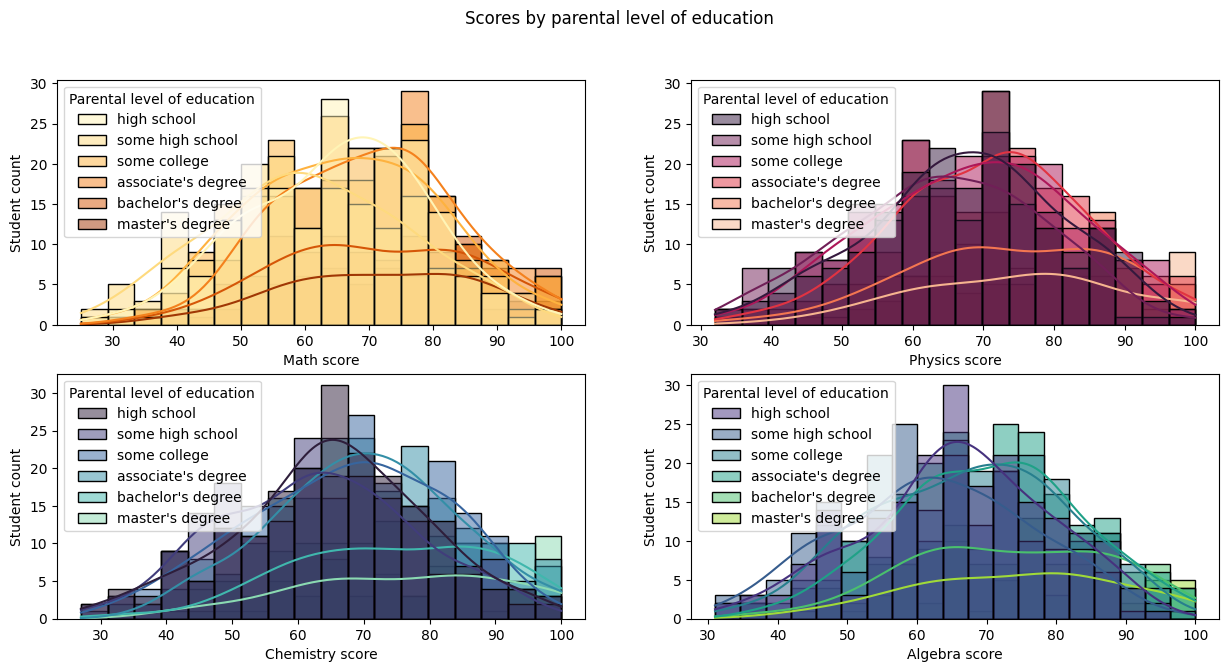

In [33]:
fig,axs = plt.subplots(2,2, figsize = (15,7))

sns.histplot(data=df_7, x="Math score", kde=True, ax=axs[0, 0], palette='YlOrBr', hue="Parental level of education")
sns.histplot(data=df_7, x="Physics score", kde=True, ax=axs[0, 1], palette="rocket", hue="Parental level of education")
sns.histplot(data=df_7, x="Chemistry score", kde=True, ax=axs[1, 0], palette="mako", hue="Parental level of education")
sns.histplot(data=df_7, x="Algebra score", kde=True, ax=axs[1, 1], palette="viridis", hue="Parental level of education")
setYlabel(axs,"Student count")
fig.suptitle("Scores by parental level of education")
fig.show()

Podemos observar que los hijos de padres que han alcanzado niveles de educación tales como maestrías o licenciaturas tienen calificaciones mayormente altas, para hijos de padres que han alcanzado niveles tales como grados de asociado o alguna educación superior las calificaciones no son tan altas como el anterior grupo, pero son más altas que las calificaciones de aquellos hijos con padres que solo alcanzaron niveles de educación de secundaria o bachilleratos. Veamos que pasa con el promedio de las calificaciones:

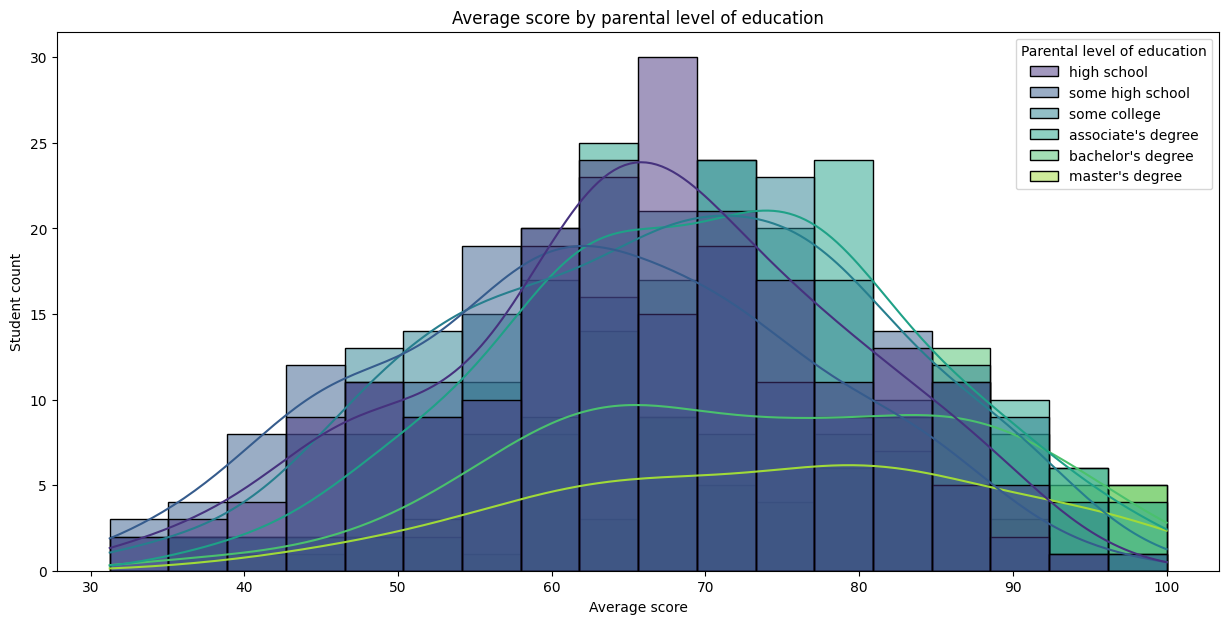

In [34]:
plt.figure(figsize=(15,7))
sns.histplot(data=df_7, x="Average score", kde=True, palette="viridis", hue="Parental level of education")
plt.ylabel("Student count")
plt.title("Average score by parental level of education")
plt.show()

In [35]:
levels = df_7["Parental level of education"].unique()
dc = {}

for level in levels:
    dc[level] = round(df_7[df_7["Parental level of education"] == level].mean(), 3)

pd.DataFrame(data=dc)

,high school,some high school,some college,associate's degree,bachelor's degree,master's degree
Math score,65.348,60.957,66.117,69.687,71.491,71.586
Physics score,67.597,64.824,68.812,71.090,74.009,75.429
Chemistry score,65.055,62.973,67.423,70.204,74.411,75.886
Algebra score,65.990,62.909,67.446,70.323,73.321,74.343
Average score,65.998,62.916,67.450,70.326,73.308,74.311


Aquí podemos corroborar que el análisis anteriormente realizado es correcto. Se recomienda a la institución encuestar al alumnado para conocer sobre el estado del apoyo escolar que se le brinda en su hogar y así poder generar programas de apoyo para los estudiantes que más lo necesiten.

### ¿Cómo es el desempeño en cada asignatura de acuerdo al género?

In [36]:
fig = px.box(df_7, 
            x=["Math score", "Physics score", "Chemistry score", "Algebra score", "Average score"], 
            color="Gender",
        )
fig.update_layout(
    title="Scores by gender",
    xaxis_title="Scores",
    yaxis_title="Subjects"
)
fig.show()

Claramente, podemos ver que las chicas tienen un mejor desempeño que los chicos en al menos 3 de las 4 asignaturas, siendo estás Física, Química y Álgebra, pero en Matemáticas la balanza se inclina a favor de los chicos. Veamos cuanta es la diferencia de las calificaciones en promedio:

In [37]:
female_median_score = round(df_7[df_7["Gender"] == 'female'].mean(), 3)
male_median_score = round(df_7[df_7["Gender"] == 'male'].mean(), 3)
pd.DataFrame(data={'female':female_median_score, 'male':male_median_score})

,female,male
Math score,63.654,69.549
Physics score,72.321,66.557
Chemistry score,72.131,64.275
Algebra score,69.359,66.802
Average score,69.366,66.796


Si bien no hay una gran brecha entre las calificaciones promedio de hombres y mujeres, existe una diferencia que debería analizarse teniendo en cuenta otros factores tales como el nivel de estudio de los padres, el tipo de almuerzo o si han realizado el curso de preparatorio, también podemos atribuir esta diferencia a la prioridad que cada grupo ha puesto sobre cada asignatura, pero esto es un aspecto que no podremos analizar por falta de información. Por ejemplo, veamos como es el almuerzo de hombres y mujeres, que como ya vimos es el factor dentro de nuestro dataset que más influye sobre las calificaciones:

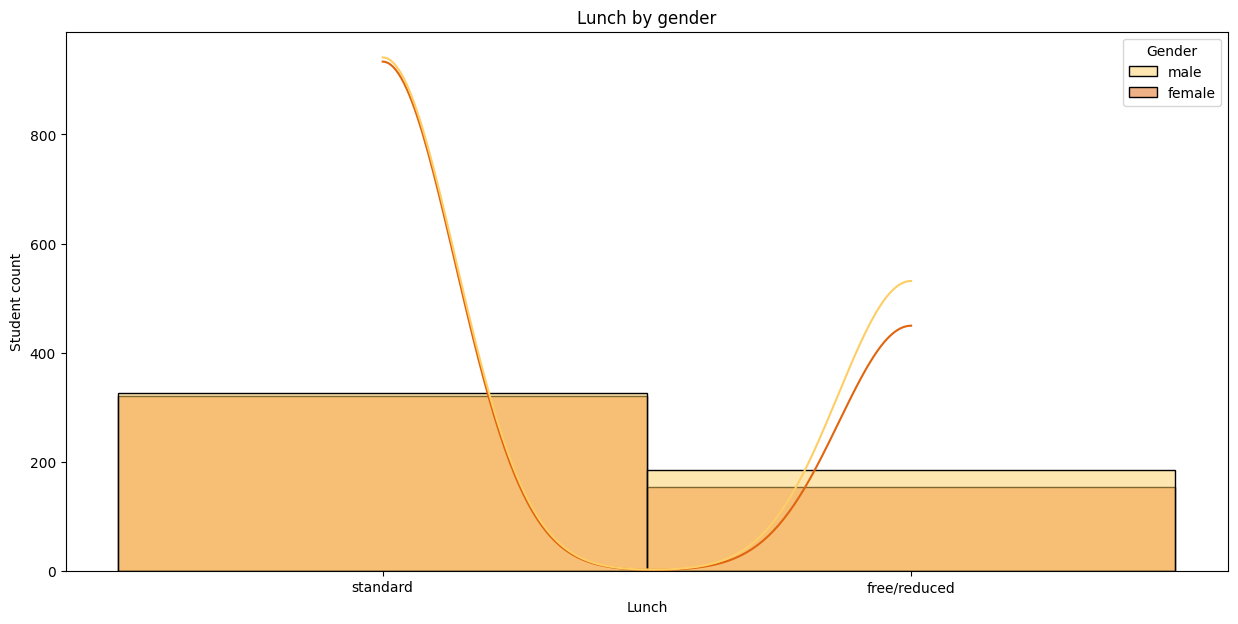

In [38]:
plt.figure(figsize=(15,7))
sns.histplot(data=df_7, x="Lunch", kde=True, palette='YlOrBr', hue="Gender")
plt.ylabel("Student count")
plt.title("Lunch by gender")
plt.show()

Podemos ver qué dentro de la población de estudiantes que tienen almuerzos estándar, la cantidad de hombres y mujeres es casi pareja, pero hay un desbalance en la población de estudiantes que tienen almuerzos free o reducidos, siendo hombres los de mayor cantidad en esta categoría, si bien no es tanta la diferencia podría influir en la diferencia de calificaciones entre ambos grupos. Ahora veamos qué porcentaje de hombres y mujeres completaron el curso de preparatorio:

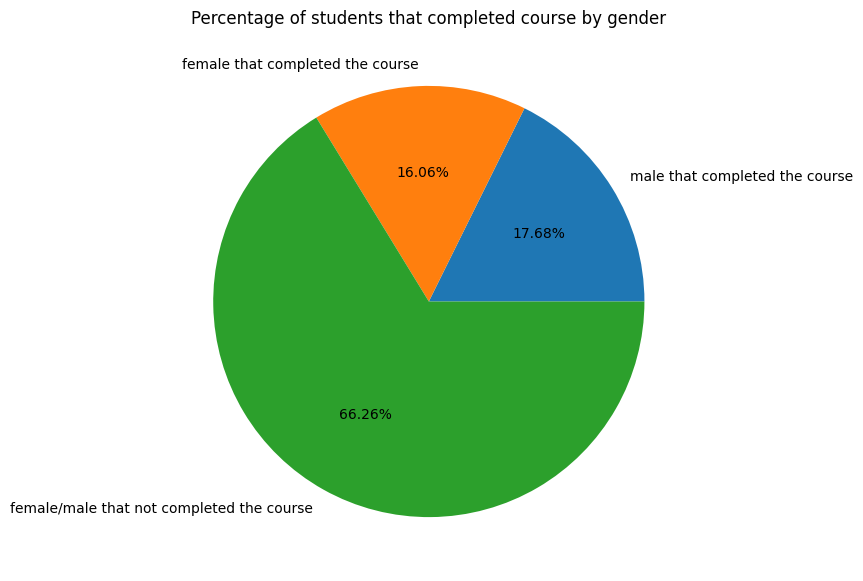

In [39]:
p_male_test_c = 100 * df_6[(df_6["Gender"] == 'male')&(df_6["Test preparation course"] == 'completed')].shape[0] / df_6.shape[0]
p_female_test_c = 100 * df_6[(df_6["Gender"] == 'female')&(df_6["Test preparation course"] == 'completed')].shape[0] / df_6.shape[0]

plt.figure(figsize=(15,7))
plt.pie([p_male_test_c, p_female_test_c, 100 - (p_male_test_c + p_female_test_c)], 
        labels=["male that completed the course", "female that completed the course", "female/male that not completed the course"], 
        autopct='%1.2f%%')
plt.title("Percentage of students that completed course by gender")
plt.show()


La diferencia nos dice que hubo un 1.62% más de hombres que finalizaron el curso, como ya dijimos completar el curso beneficiaba ligeramente las calificaciones de los estudiantes, pero claramente esto no alcanzo para que los hombres igualen las calificaciones de las mujeres. Veamos también el porcentaje de hijas e hijos con padres con determinado nivel de educación:

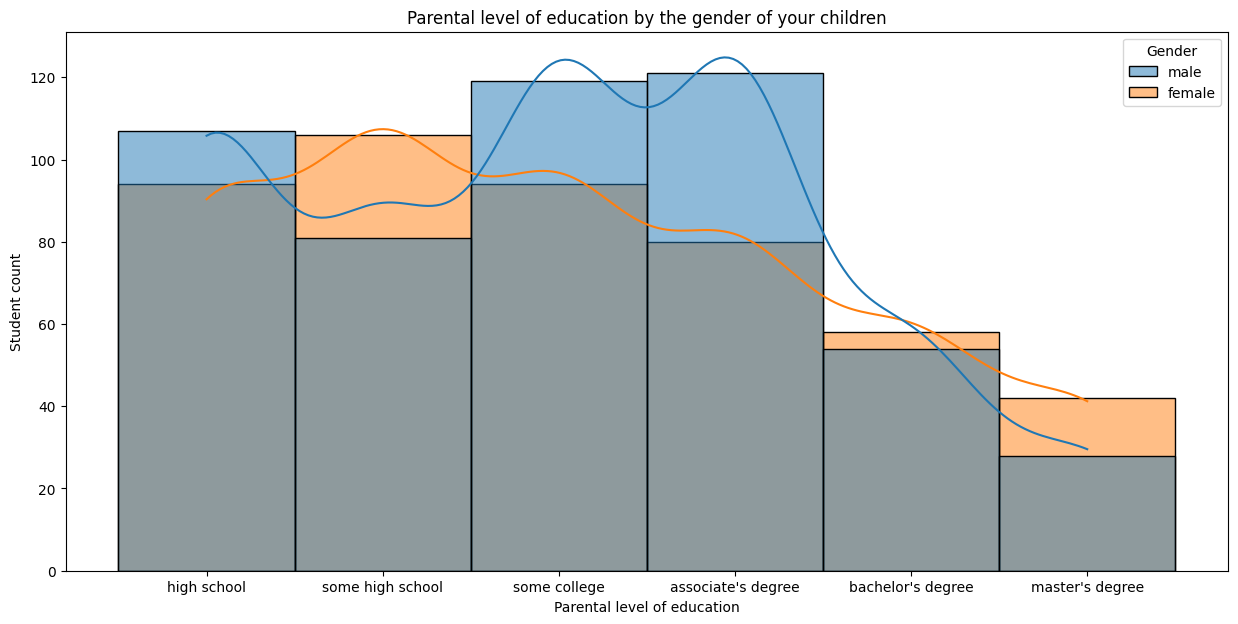

In [40]:
plt.figure(figsize=(15,7))
sns.histplot(data=df_7, x="Parental level of education", kde=True, hue="Gender")
plt.title("Parental level of education by the gender of your children")
plt.ylabel("Student count")
plt.show()

Sucede algo similar, los hijos/as con padres con niveles de educación más altos conseguirán mejores calificaciones, los dos niveles más altos de educación son liderados por padres con hijas, pero nos es tanta la diferencia, al menos en la categoría de licenciaturas, en cambio, para el tercer y cuarto nivel más alto de educación que son liderados por padres con hijos existe una amplia diferencia en ambos niveles, a priori los hombres deberían tener la ventaja con sus calificaciones, pero no es así. 

En conclusión, estos análisis nos dicen que las chicas han realizado un excelente trabajo, ¡Felicitaciones, muy bien por ellas!. Chicos, lo siento, deben esforzarse un poco más. Se recomienda analizar el contenido de las asignaturas para causar mayor interés en el grupo con menor rendimiento.

### ¿El tipo de almuerzo influye en las calificaciones de los estudiantes?

In [41]:
#px.strip(df_7, x="Math score", y="Lunch", color='Lunch')
sr_std = df_7[df_7["Lunch"] == 'standard'].mean()
sr_free = df_7[df_7["Lunch"] == 'free/reduced'].mean()

labels = []
for label in sr_std.index:
    if label != 'Average score':
        label_arr = label.split()
        labels.append(label_arr[0] + ' average ' + label_arr[1])
    else:
        labels.append(label)

fig = go.Figure(data=[
    go.Bar(name='Standard Lunch', x=labels, y=sr_std.values, text=sr_std.values),
    go.Bar(name='Free/Reduced Lunch', x=labels, y=sr_free.values, text=sr_free.values)
])

fig.update_layout(barmode='group', uniformtext_minsize=8,
                    uniformtext_mode='hide',
                    title="Averages scores by type lunch",
                    yaxis_title="Score value")
fig.update_traces(texttemplate='%{text:.5s}',
                    textposition='outside')
fig.show()

Con este simple gráfico podemos observar como sé potencian las calificaciones promedio debido al tipo de almuerzo del estudiante, veamos que pasa con las calificaciones individuales de cada estudiante:

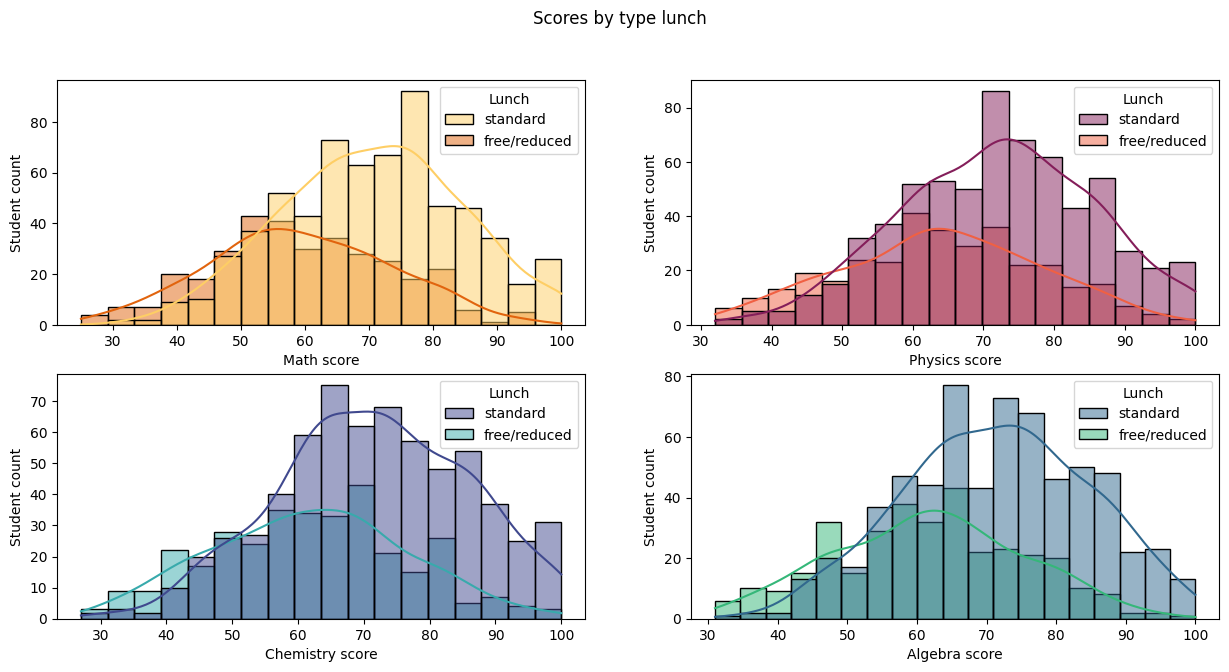

In [42]:
fig,axs = plt.subplots(2,2, figsize = (15,7))

sns.histplot(data=df_7, x="Math score", kde=True, ax=axs[0, 0], palette='YlOrBr', hue="Lunch")
sns.histplot(data=df_7, x="Physics score", kde=True, ax=axs[0, 1], palette="rocket", hue="Lunch")
sns.histplot(data=df_7, x="Chemistry score", kde=True, ax=axs[1, 0], palette="mako", hue="Lunch")
sns.histplot(data=df_7, x="Algebra score", kde=True, ax=axs[1, 1], palette="viridis", hue="Lunch")
setYlabel(axs,"Student count")
fig.suptitle("Scores by type lunch")
fig.show()

Solamente con observar como les fue a los estudiantes en Matemáticas podemos decir que el tipo de almuerzo es un factor que influye bastante en las calificaciones. Y esto es claro, ya que nuestro cerebro necesita energía para funcionar correctamente, pues los alimentos nos proporcionan dicha energía. La institución debe analizar la posibilidad de aportar algún tipo de alimento, como una merienda o viandas, a sus estudiantes para que estos mejoren su rendimiento académico sustancialmente, además debe encuestarse a los estudiantes acerca de su rutina alimentaria fuera de la institución en busca de alumnos que presenten problemas de acceso a una alimentación saludable.

### ¿Qué implicancia tienen las etnias de los estudiantes?

In [43]:
etnias = df_7['Ethnicity'].unique()
promediosXetnias = []
for etnia in etnias:
    promediosXetnias.append(df_7[df_7['Ethnicity'] == etnia].mean().values)
df_etnias = pd.DataFrame(data=promediosXetnias, columns=etnias, index=df_7.mean().index)
df_etnias

,group A,group D,group E,group B,group C
Math score,64.884615,68.192308,66.615385,66.602564,66.573718
Physics score,69.401544,72.169884,72.305019,71.270270,71.286680
Chemistry score,74.488372,72.534884,70.201550,72.434109,72.414729
Algebra score,63.746269,67.845771,66.497512,66.024876,66.028607
Average score,63.671924,66.936909,65.063091,65.223975,65.223975


In [44]:
fig = go.Figure(data=[
    go.Bar(name='Math score', x=df_etnias.columns, y=df_etnias.loc["Math score"], text=df_etnias.loc["Math score"]),
    go.Bar(name='Physics score', x=df_etnias.columns, y=df_etnias.loc["Physics score"], text=df_etnias.loc["Physics score"], visible=False),
    go.Bar(name='Chemistry score', x=df_etnias.columns, y=df_etnias.loc["Chemistry score"], text=df_etnias.loc["Chemistry score"], visible=False),
    go.Bar(name='Algebra score', x=df_etnias.columns, y=df_etnias.loc["Algebra score"], text=df_etnias.loc["Algebra score"], visible=False),
    go.Bar(name='Average score', x=df_etnias.columns, y=df_etnias.loc["Average score"], text=df_etnias.loc["Average score"], visible=False),
])

fig.update_layout(barmode='stack', uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(texttemplate='%{text:.5s}', textposition='outside')

steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)}],
        label=fig.data[i].name + 's'
    )
    step["args"][0]["visible"][i] = True
    steps.append(step)

sliders = [dict(
    active=10,
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title="Average scores by ethnicities",
    xaxis_title="Ethnicities",
    yaxis_title="Average score value"
)

fig.show()

In [45]:
for etnia in etnias:
    print(f'Al {etnia} pertenecen {df_7[df_7["Ethnicity"] == etnia].shape[0]} estudiantes')

Al group A pertenecen 78 estudiantes
Al group D pertenecen 259 estudiantes
Al group E pertenecen 129 estudiantes
Al group B pertenecen 201 estudiantes
Al group C pertenecen 317 estudiantes


Conclusión: Los grupos E, B y C presentan promedios similares, el grupo D presenta el promedio más alto y, a diferencia del resto, el grupo A presenta el promedio más bajo de todos, casualmente este grupo son los de menos población, esto puede deberse a que este grupo no sea nativo del país, y el bajo promedio, que tampoco es muy distinto del resto, puede deberse a factores de adaptabilidad de la propia etnia, podrían presentar dificultades para interpretar el lenguaje nativo o simplemente están acostumbrados a otro tipo de enseñanza, se recomienda realizar encuestas al alumnado sobre el desarrollo de las asignaturas, las dificultades que se les presentan y sobre el desempeño de los profesores para detectar y descartar posibles problemas.

# Contacto

<div style="display: flex; justify-content:space-around; padding:20px;">
    <div style="flex-basis:45%">
        <img src="/work/alex.jpg">
    </div>
    <div style="width:3px; heigth:50%; background-color:#4488CD"></div>
    <div 
    style="display:flex; 
    flex-direction: column; 
    justify-content:center; 
    align-items: center; 
    background-color:#4488CD;
    padding:40px;
    border-radius:10px;
    flex-basis:45%;">
        <h1 color=white style="text-align:center">Alexander Daniel Rios</h1>
        <h4 color=white>Mis redes</h4>
        <div 
        style="display: flex; 
        gap:10px;
        justify-content:center; 
        background-color:#234a74;
        box-shadow: inset 0 0 15px #000;
        width:100%;
        border-radius:10px">
            <a href="https://www.linkedin.com/in/alexander-daniel-rios/" style="text-decoration: none;">
                <img src="/work/linkedin.png" width=60px height=60px style="object-fit:cover; display:block">
            </a>
            <a href="https://github.com/aletbm" style="text-decoration: none;">
                <img src="/work/github.png" width=60px height=60px>
            </a>
            <a href="https://www.instagram.com/alexander.daniel.rios/" style="text-decoration: none;">
                <img src="/work/instagram.png" width=60px height=60px>
            </a>
        </div>
    </div>
</div>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=73bbfcf6-263d-4747-a564-819312fa6cea' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>